## Pairs Trading ##

by Changjie Ma

###  imports

In [1]:
import numpy
import pandas
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")
    
params={
    #"font.size":20,
    "figure.titlesize":"large",
    "lines.linewidth":3,
    #"legend.fontsize":"small",
    #"xtick.labelsize":"x-small",
    #"ytick.labelsize":"x-small",
    #"axes.labelsize": 'small',
}
plt.rcParams.update(params) 

In [2]:
ticker_A="EQNR"
ticker_B="BP"
color_A="red"
color_B="blue"

## read in data

In [3]:
data_A=pandas.read_csv(ticker_A+".csv",index_col=0)
data_A.index = pandas.to_datetime(data_A.index)
print(data_A.head(10))
adj_A=pandas.Series(data_A["Adj Close"],name=ticker_A)

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-02-05  22.860001  22.879999  21.850000  21.969999  21.176506  3643600
2018-02-06  21.940001  22.610001  21.860001  22.480000  21.668089  2913600
2018-02-07  23.100000  23.360001  22.450001  22.590000  21.774117  2881100
2018-02-08  22.420000  22.440001  21.709999  21.709999  21.131790  3017400
2018-02-09  21.590000  21.730000  20.930000  21.510000  20.937119  2864000
2018-02-12  21.750000  22.070000  21.700001  21.930000  21.345932  2259300
2018-02-13  21.980000  22.200001  21.879999  22.129999  21.540606  1655900
2018-02-14  21.530001  22.350000  21.500000  22.350000  21.754747  2060300
2018-02-15  22.459999  22.480000  22.110001  22.459999  21.861816  1979000
2018-02-16  22.400000  22.730000  22.360001  22.530001  21.929953  1416300


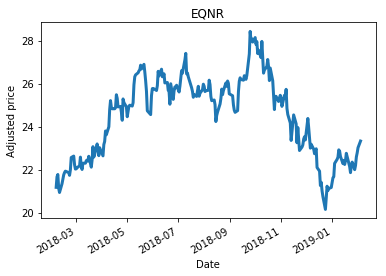

In [4]:
fig, ax = plt.subplots()
plt.plot(adj_A.index,adj_A,label=ticker_A)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(ticker_A)
fig.autofmt_xdate()
saver("tickerA")
plt.show()
plt.close()

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-02-05  40.779999  40.869999  36.150002  39.779999  37.608753  16464900
2018-02-06  39.540001  40.840000  39.419998  40.570000  38.355633  10875200
2018-02-07  40.540001  41.009998  39.919998  40.000000  37.816750   8591300
2018-02-08  40.540001  40.680000  39.540001  39.549999  37.391312   8618000
2018-02-09  39.259998  39.500000  37.900002  39.110001  36.975323  11432500
2018-02-12  39.610001  39.990002  39.529999  39.869999  37.693840   7224300
2018-02-13  39.709999  39.889999  39.590000  39.689999  37.523663   4329500
2018-02-14  39.380001  40.430000  39.279999  40.369999  38.166550   7120200
2018-02-15  40.080002  40.099998  39.330002  39.840000  38.233727   5251100
2018-02-16  39.610001  40.020000  39.509998  39.619999  38.022602   4667200


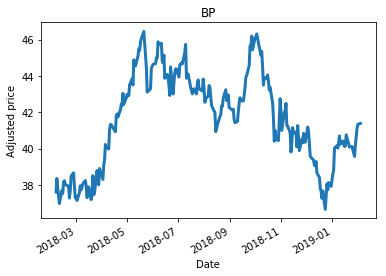

In [5]:
data_B=pandas.read_csv(ticker_B+".csv",index_col=0)
data_B.index = pandas.to_datetime(data_B.index)
print(data_B.head(10))
adj_B=pandas.Series(data_B["Adj Close"],name=ticker_B)

fig, ax = plt.subplots()
plt.plot(adj_B.index,adj_B,label=ticker_B)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title(ticker_B)
fig.autofmt_xdate()
saver("tickerB")
plt.show()
plt.close()

## Compare the stocks

In [6]:
#trading days are different in different countries
joined_data=pandas.concat([adj_A,adj_B],axis="columns").dropna(axis="index")
print(joined_data.head())
(adj_A,adj_B)=(joined_data[ticker_A],joined_data[ticker_B])

                 EQNR         BP
Date                            
2018-02-05  21.176506  37.608753
2018-02-06  21.668089  38.355633
2018-02-07  21.774117  37.816750
2018-02-08  21.131790  37.391312
2018-02-09  20.937119  36.975323


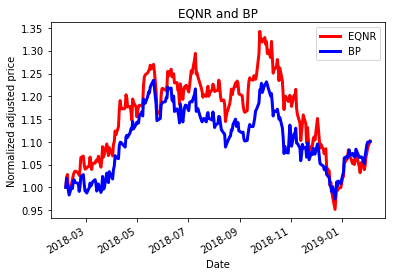

In [7]:
normalized_A=adj_A/adj_A[0]
normalized_B=adj_B/adj_B[0]

fig, ax = plt.subplots()
plt.plot(normalized_A.index,normalized_A,label=ticker_A,color=color_A)
plt.plot(normalized_B.index,normalized_B,label=ticker_B,color=color_B)
plt.legend()
plt.ylabel("Normalized adjusted price")
plt.xlabel("Date")
plt.title(ticker_A+" and "+ticker_B)
fig.autofmt_xdate()
saver("pair")
plt.show()
plt.close()

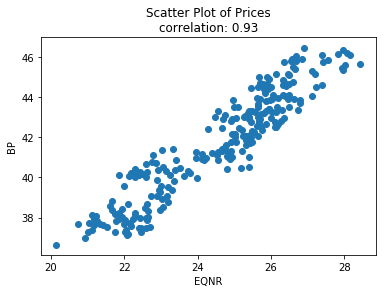

In [8]:
corr,_=scipy.stats.pearsonr(adj_A,adj_B)
title_str="Scatter Plot of Prices\ncorrelation: {:.2f}".format(corr)
plt.scatter(adj_A,adj_B)
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title(title_str)
saver("scatter")
plt.show()
plt.close()

## Part 1 regress EQNR on BP

### 1.1 regression

slope: 1.2868814922828589
intercept: 10.10756951887062
Date
2018-02-05    0.249530
2018-02-06    0.363801
2018-02-07   -0.311528
2018-02-08    0.089633
2018-02-09   -0.075837
Name: residual, dtype: float64
BP=1.29EQNR+10.11


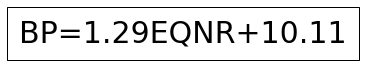

In [9]:
slope, intercept, _,_,_= scipy.stats.linregress(
    adj_A,adj_B)
print("slope: "+str(slope))
print("intercept: "+str(intercept))
portfolio=adj_B-adj_A*slope
portfolio.name="Portfolio"
residual=adj_B-(intercept+adj_A*slope)
residual.name="residual"
print(residual.head())

text_str="{}={:.2f}{}{:+.2f}".format(ticker_B,slope,ticker_A,intercept)
print(text_str)
fig,ax=plt.subplots(figsize=(_,_))
ax.add_artist(offsetbox.AnchoredText(text_str, loc="center",prop=dict(size=30)))
ax.axis('off')
saver("regress_formula")
plt.show()
plt.close()

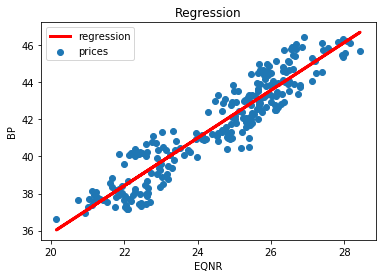

In [10]:
plt.scatter(adj_A,adj_B,label="prices")
plt.plot(adj_A,intercept+adj_A*slope,color="red",label="regression")
plt.legend()
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title("Regression")
saver("regression")
plt.show()
plt.close()

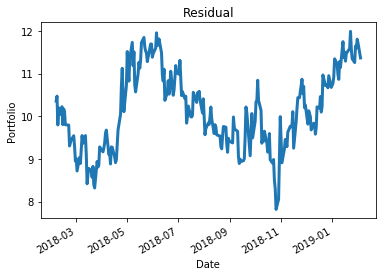

In [11]:
fig, ax = plt.subplots()
plt.plot(portfolio.index,portfolio,label="signal")
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Residual")
fig.autofmt_xdate()
saver("residual")
plt.show()
plt.close()

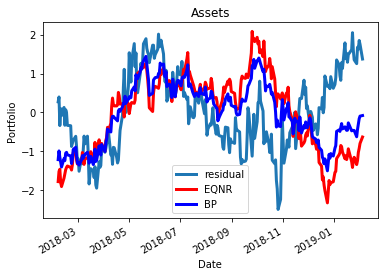

In [12]:
fig, ax = plt.subplots()
plt.plot(portfolio.index,(portfolio-portfolio.mean())/portfolio.std(),label="residual")
plt.plot(normalized_A.index,(normalized_A-normalized_A.mean())/normalized_A.std(),label=ticker_A,color=color_A)
plt.plot(normalized_B.index,(normalized_B-normalized_B.mean())/normalized_A.std(),label=ticker_B,color=color_B)
plt.legend()
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Assets")
fig.autofmt_xdate()
saver("assets")
plt.show()
plt.close()

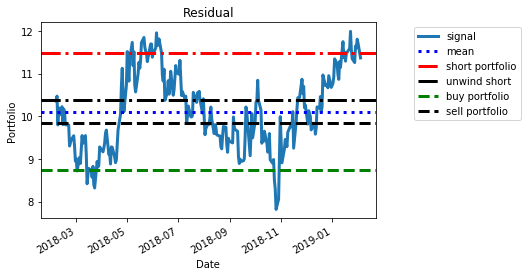

In [13]:
portfolio_mean=portfolio.mean()
portfolio_std=portfolio.std()

fig, ax = plt.subplots()
plt.plot(portfolio.index,portfolio,label="signal")
plt.axhline(portfolio_mean,color="blue",linestyle=":",label="mean")
plt.axhline(portfolio_mean+1.5*portfolio_std,color="red",linestyle="-.",label="short portfolio")
plt.axhline(portfolio_mean+0.3*portfolio_std,linestyle="-.",color="black",label="unwind short")
plt.axhline(portfolio_mean-1.5*portfolio_std,color="green",linestyle="--",label="buy portfolio")
plt.axhline(portfolio_mean-0.3*portfolio_std,linestyle="--",color="black",label="sell portfolio")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Residual")
fig.autofmt_xdate()
saver("residual_strategy")
plt.show()
plt.close()

### 1.2 signal analysis

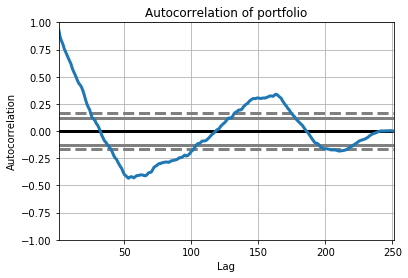

In [14]:
plt.figure()
autocorrelation_plot(portfolio)
plt.title("Autocorrelation of portfolio")
saver("acf_portfolio")
plt.show()
plt.close()

In [15]:
residual_lagged=residual.shift(periods=1)
residual_lagged.name="residual_lagged"
DF=pandas.concat([residual,residual_lagged],axis=1)
print(DF.head())
DF=DF.dropna(axis="index")
print(DF.head())

            residual  residual_lagged
Date                                 
2018-02-05  0.249530              NaN
2018-02-06  0.363801         0.249530
2018-02-07 -0.311528         0.363801
2018-02-08  0.089633        -0.311528
2018-02-09 -0.075837         0.089633
            residual  residual_lagged
Date                                 
2018-02-06  0.363801         0.249530
2018-02-07 -0.311528         0.363801
2018-02-08  0.089633        -0.311528
2018-02-09 -0.075837         0.089633
2018-02-12  0.116586        -0.075837


AR slope: 0.9340149953808722
AR intercept: 0.0037073894101473867
noise mean 1.4210854715202004e-17
noise std:  0.3352624939076767


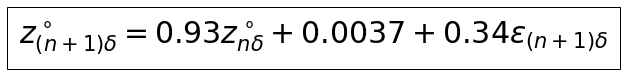

In [16]:
slope_R, intercept_R, _, _, _ = scipy.stats.linregress(
    DF["residual_lagged"],DF["residual"])
print("AR slope: "+str(slope_R))
print("AR intercept: "+str(intercept_R))
noise=DF["residual"]-(intercept_R+DF["residual_lagged"]*slope_R)
noise_std=numpy.std(noise)
noise_normalized=noise/noise_std
print("noise mean",numpy.mean(noise))
print("noise std: ",noise_std)

text_str=r"$z^\circ_{{(n+1)\delta}}={:.2f}z^\circ_{{n\delta}}+{:.4f}+{:.2f}\varepsilon_{{(n+1)\delta}}$".format(slope_R,intercept_R,noise_std)
fig,ax=plt.subplots(figsize=(_,_))
ax.add_artist(offsetbox.AnchoredText(text_str, loc="center",prop=dict(size=30)))
ax.axis('off')
saver("AR_formula")
plt.show()
plt.close()

### 1.3 analysis of signal noise

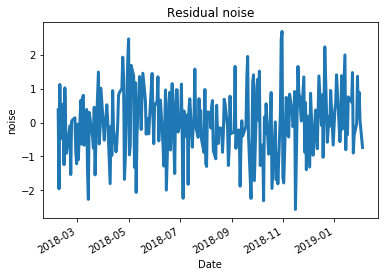

In [17]:
fig, ax = plt.subplots()
plt.plot(noise_normalized.index,noise_normalized,label="dW")
plt.ylabel("noise")
plt.xlabel("Date")
plt.title("Residual noise")
fig.autofmt_xdate()
saver("res_noise")
plt.show()
plt.close()

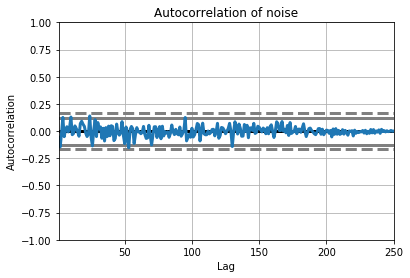

In [18]:
plt.figure()
autocorrelation_plot(noise_normalized)
plt.title("Autocorrelation of noise")
saver("acf_noise")
plt.show()
plt.close()

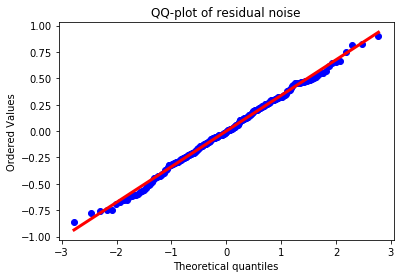

In [19]:
scipy.stats.probplot(noise.values, dist="norm", plot=plt)
plt.title("QQ-plot of residual noise")
saver("QQ")
plt.show()
plt.close()

noise mean: 2.220446049250313e-18
noise std: 1.0


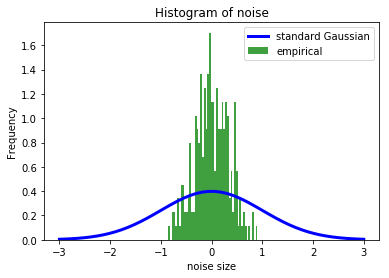

In [20]:
noise_mean=numpy.mean(noise_normalized)
noise_std=numpy.std(noise_normalized)
print("noise mean:",noise_mean)
print("noise std:",noise_std)
xvals=numpy.linspace(start=-3,stop=3)
fvals=scipy.stats.norm.pdf(xvals)
plt.figure()
plt.hist(noise, 50, facecolor='green', alpha=0.75,density=True,label="empirical")
plt.plot(xvals,fvals,label="standard Gaussian",color="blue")
plt.legend()
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title("Histogram of noise")
saver("noise_hist")
plt.show()
plt.close()

## Part 2 regress BP on EQNR

### 2.1 regression

slope: 0.6790418679931006
intercept: -3.770342876955727
Date
2018-02-05   -0.591069
2018-02-06   -0.606649
2018-02-07   -0.134697
2018-02-08   -0.488133
2018-02-09   -0.400331
Name: residual, dtype: float64
EQNR=0.68BP-3.77


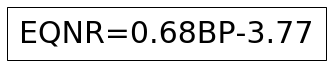

In [21]:
slope, intercept, _,_,_= scipy.stats.linregress(
    adj_B,adj_A)
print("slope: "+str(slope))
print("intercept: "+str(intercept))
portfolio=adj_A-adj_B*slope
portfolio.name="Portfolio"
residual=adj_A-(intercept+adj_B*slope)
residual.name="residual"
print(residual.head())

text_str="{}={:.2f}{}{:+.2f}".format(ticker_A,slope,ticker_B,intercept)
print(text_str)
fig,ax=plt.subplots(figsize=(_,_))
ax.add_artist(offsetbox.AnchoredText(text_str, loc="center",prop=dict(size=30)))
ax.axis('off')
saver("regress_formula")
plt.show()
plt.close()

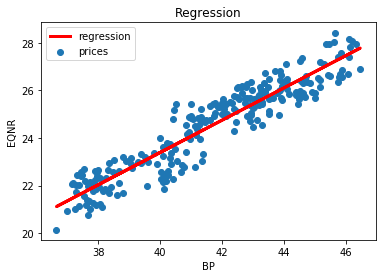

In [22]:
plt.scatter(adj_B,adj_A,label="prices")
plt.plot(adj_B,intercept+adj_B*slope,color="red",label="regression")
plt.legend()
plt.xlabel(ticker_B)
plt.ylabel(ticker_A)
plt.title("Regression")
saver("regression")
plt.show()
plt.close()

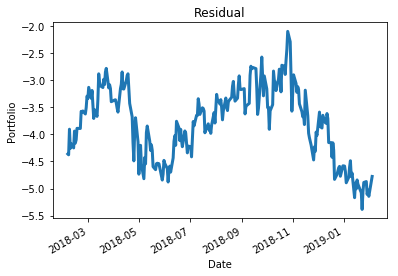

In [23]:
fig, ax = plt.subplots()
plt.plot(portfolio.index,portfolio,label="signal")
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Residual")
fig.autofmt_xdate()
saver("residual")
plt.show()
plt.close()

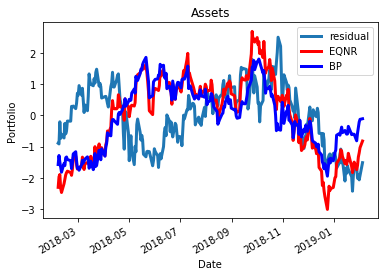

In [24]:
fig, ax = plt.subplots()
plt.plot(portfolio.index,(portfolio-portfolio.mean())/portfolio.std(),label="residual")
plt.plot(normalized_A.index,(normalized_A-normalized_A.mean())/normalized_B.std(),label=ticker_A,color=color_A)
plt.plot(normalized_B.index,(normalized_B-normalized_B.mean())/normalized_B.std(),label=ticker_B,color=color_B)
plt.legend()
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Assets")
fig.autofmt_xdate()
saver("assets")
plt.show()
plt.close()

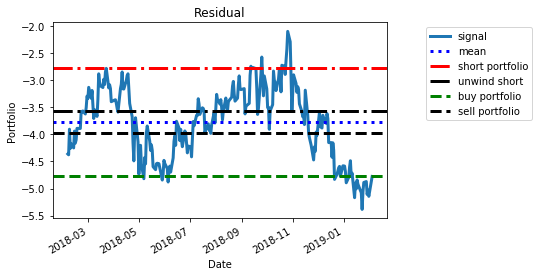

In [25]:
portfolio_mean=portfolio.mean()
portfolio_std=portfolio.std()

fig, ax = plt.subplots()
plt.plot(portfolio.index,portfolio,label="signal")
plt.axhline(portfolio_mean,color="blue",linestyle=":",label="mean")
plt.axhline(portfolio_mean+1.5*portfolio_std,color="red",linestyle="-.",label="short portfolio")
plt.axhline(portfolio_mean+0.3*portfolio_std,linestyle="-.",color="black",label="unwind short")
plt.axhline(portfolio_mean-1.5*portfolio_std,color="green",linestyle="--",label="buy portfolio")
plt.axhline(portfolio_mean-0.3*portfolio_std,linestyle="--",color="black",label="sell portfolio")
plt.legend(bbox_to_anchor=(1.1, 1))
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Residual")
fig.autofmt_xdate()
saver("residual_strategy")
plt.show()
plt.close()

### 2.2 signal analysis

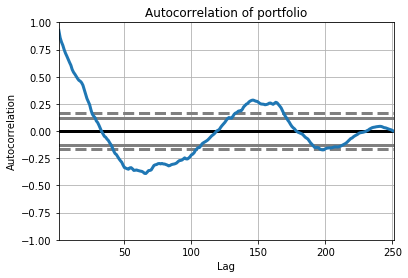

In [26]:
plt.figure()
autocorrelation_plot(portfolio)
plt.title("Autocorrelation of portfolio")
saver("acf_portfolio")
plt.show()
plt.close()

In [27]:
residual_lagged=residual.shift(periods=1)
residual_lagged.name="residual_lagged"
DF=pandas.concat([residual,residual_lagged],axis=1)
print(DF.head())
DF=DF.dropna(axis="index")
print(DF.head())

            residual  residual_lagged
Date                                 
2018-02-05 -0.591069              NaN
2018-02-06 -0.606649        -0.591069
2018-02-07 -0.134697        -0.606649
2018-02-08 -0.488133        -0.134697
2018-02-09 -0.400331        -0.488133
            residual  residual_lagged
Date                                 
2018-02-06 -0.606649        -0.591069
2018-02-07 -0.134697        -0.606649
2018-02-08 -0.488133        -0.134697
2018-02-09 -0.400331        -0.488133
2018-02-12 -0.479421        -0.400331


AR slope: 0.9346813652691085
AR intercept: -0.0013938883893536182
noise mean 7.549516567451065e-18
noise std:  0.24103948193412833


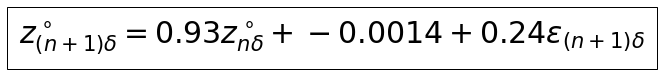

In [28]:
slope_R, intercept_R, _, _, _ = scipy.stats.linregress(
    DF["residual_lagged"],DF["residual"])
print("AR slope: "+str(slope_R))
print("AR intercept: "+str(intercept_R))
noise=DF["residual"]-(intercept_R+DF["residual_lagged"]*slope_R)
noise_std=numpy.std(noise)
noise_normalized=noise/noise_std
print("noise mean",numpy.mean(noise))
print("noise std: ",noise_std)

text_str=r"$z^\circ_{{(n+1)\delta}}={:.2f}z^\circ_{{n\delta}}+{:.4f}+{:.2f}\varepsilon_{{(n+1)\delta}}$".format(slope_R,intercept_R,noise_std)
fig,ax=plt.subplots(figsize=(_,_))
ax.add_artist(offsetbox.AnchoredText(text_str, loc="center",prop=dict(size=30)))
ax.axis('off')
saver("AR_formula")
plt.show()
plt.close()

### 2.3 analysis of signal noise

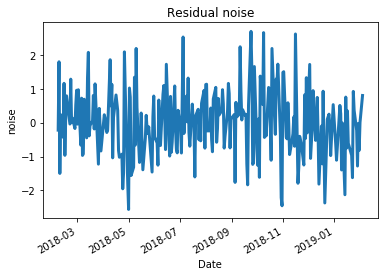

In [29]:
fig, ax = plt.subplots()
plt.plot(noise_normalized.index,noise_normalized,label="dW")
plt.ylabel("noise")
plt.xlabel("Date")
plt.title("Residual noise")
fig.autofmt_xdate()
saver("res_noise")
plt.show()
plt.close()

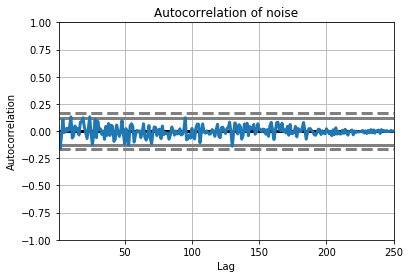

In [30]:
plt.figure()
autocorrelation_plot(noise_normalized)
plt.title("Autocorrelation of noise")
saver("acf_noise")
plt.show()
plt.close()

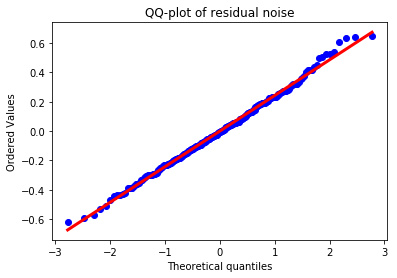

In [31]:
scipy.stats.probplot(noise.values, dist="norm", plot=plt)
plt.title("QQ-plot of residual noise")
saver("QQ")
plt.show()
plt.close()

noise mean: 4.4408920985006264e-17
noise std: 1.0000000000000002


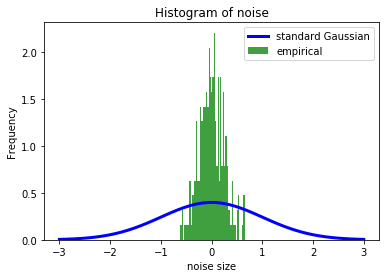

In [32]:
noise_mean=numpy.mean(noise_normalized)
noise_std=numpy.std(noise_normalized)
print("noise mean:",noise_mean)
print("noise std:",noise_std)
xvals=numpy.linspace(start=-3,stop=3)
fvals=scipy.stats.norm.pdf(xvals)
plt.figure()
plt.hist(noise, 50, facecolor='green', alpha=0.75,density=True,label="empirical")
plt.plot(xvals,fvals,label="standard Gaussian",color="blue")
plt.legend()
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title("Histogram of noise")
saver("noise_hist")
plt.show()
plt.close()